In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
import scipy.optimize as optimization
import datetime as dt
from datetime import timedelta
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6
import math
import scipy.stats
import matplotlib.pyplot as plt
import time
from ipywidgets import Checkbox
import pandas_datareader as pdr
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.append('../../ModernPortfolio_project/DEFINITIONS')

import MarkowitzModel as m_model

In [3]:
df = pd.read_csv('PreparedData_252.csv', index_col='Date')

In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
n = 252
start = df.index[0]
end = df.index[-1]
tickers = df.columns.values.tolist()

###### 1. Chosse iterations

In [6]:
iterations = 30000

##### 2. Simulate portfolios

In [7]:
results, returns, vol, weights = m_model.symulatePortfoliosWeights(df, iterations, n, m_model.calculate_N, m_model.calculate_log_rets, m_model.gen_weights, m_model.calculate_returns, m_model.calculate_volatility)

#### 3. plot

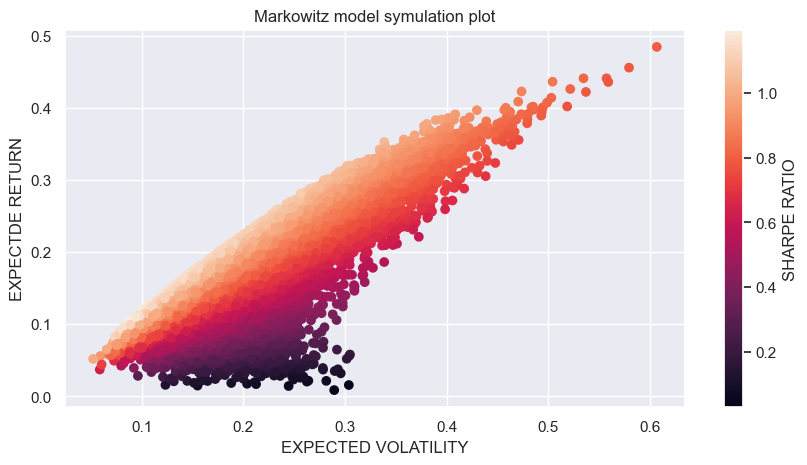

In [8]:
m_model.createResultsPlot(results)

#### 4. Sharp Ratio

In [9]:
maxSR, expected_vol, expected_ret, new_weights = m_model.findHighestSharpRatio(results);

The highest sharp ratio for selected assets is 1.1937
Expected logaritmic annual return: 0.1057
Expected annual volatility: 0.0886
Weights of wallet: [0.07039576 0.20000337 0.01384146 0.15248145 0.56327797]


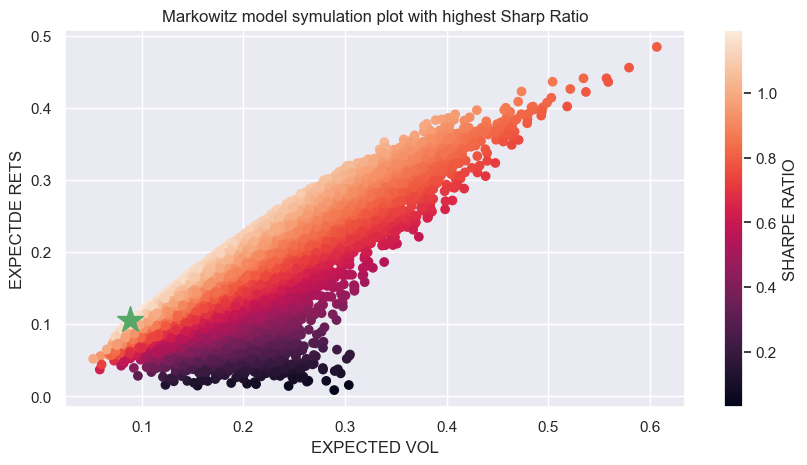

In [10]:
m_model.createResultsPlot2(results, expected_vol, expected_ret)

##### Max vol

In [11]:
# Example of how to wtire value
# 10% - 0.1
# 35% - 0.35
max_vol_yearly = 0.25 # 0.00

In [12]:
my_rets, my_vol, sharpRatio, bestWeights = m_model.findBestWeightsByMaxVol(results, max_vol_yearly)

The best portfolio consistent with the assumed annual volatility can achieve an average log return of 27.05%
Proposed portfolio weights: [0.23983931 0.24865712 0.00681225 0.44708326 0.05760805]
Expected sharp ratio: 1.098078226525921


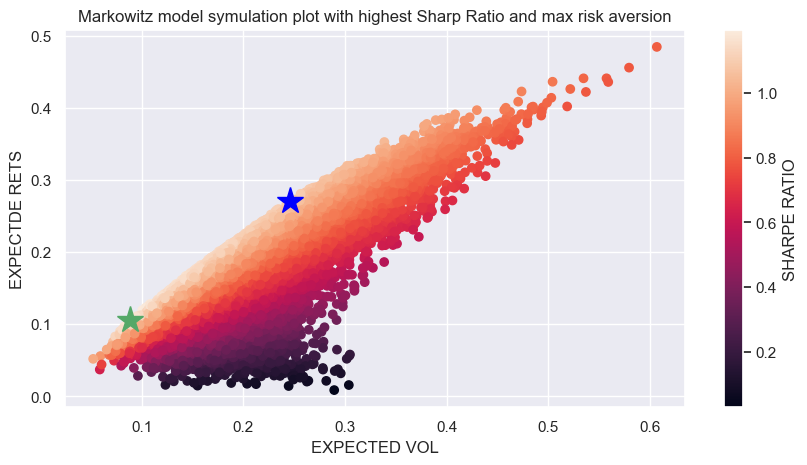

In [13]:
m_model.createResultsPlot3(results, expected_vol, expected_ret, my_vol, my_rets)

In [14]:
summary = m_model.create_summary(maxSR, sharpRatio, expected_vol, my_vol, expected_ret, my_rets, new_weights, bestWeights)
summary

,Sharp Ratio,Expected volatility,Expected log return,Wallet weights
Wallet,,,,
Highest Sharp Ratio,1.193732,0.088574,0.105734,"[0.0703957628853689, 0.200003365685077, 0.0138..."
My Choice,1.098078,0.246302,0.270459,"[0.2398393121254125, 0.24865712119621355, 0.00..."


In [15]:
HighestSR = Checkbox(description = 'Highest Sharp Ratio')
MyWallet = Checkbox(description = 'My Choice')

In [16]:
display(HighestSR, MyWallet)

Checkbox(value=False, description='Highest Sharp Ratio')

Checkbox(value=False, description='My Choice')

In [17]:
wallet = m_model.choese_wallet(HighestSR, MyWallet)

Your choice: ['Highest Sharp Ratio']


In [18]:
weights = m_model.create_weightsDataFrame(summary, wallet, df)
weights

,BTC-USD,CSPX.L,BNO,AMZN,IEF
0,0.0703957628853689,0.200003365685077,0.013841456084450103,0.15248144710829237,0.5632779682368116


In [19]:
weights.to_csv('portfolioWeights.csv', header=True)